<a href="https://colab.research.google.com/github/kleber293/calculo_numerico/blob/main/Calculo_Numerico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# $\color{Turquoise}{Conversões}$
<HR width=100% color="Turquoise	" align=left noshade>

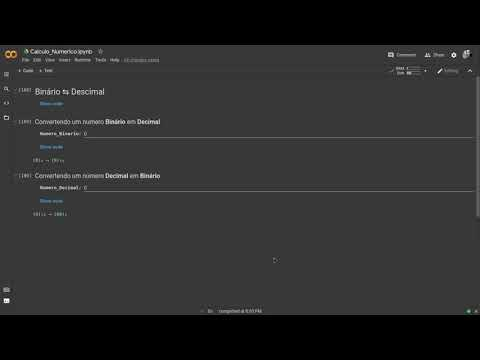

In [ ]:
#@markdown # $\color{turquoise}{\text{Vídeo de apresentação}}$
#@markdown > $\color{gray}{\text{Este vídeo apresenta a função e as suas funcionalidades}}$
from IPython.display import YouTubeVideo
YouTubeVideo('HBa5ATDFg04', width=500, height=333)

In [ ]:
#@markdown # $\color{Turquoise}{\text{Binário ⇆ Decimal}}$
#@markdown > $\color{gray}{\text{convert_bxd}}$
def convert_bxd(num, bin=False, dec=False):
    
    def saida(v1, b1, v2, b2):
        print(f'(\033[1;32m{v1}\033[){b1}', end='')
        print(' \u27F6 ', end='')
        print(f'(\033[1;32m{v2}\033[){b2}')

    def dec_inteiro(val):
        bn, bnr, val = list(), str(), int(val)
        bn.append(val % 2)
        while True:
            d = val // 2
            if d == 1 or d == 0:
                bn.append(d)
                break
            bn.append(d % 2)
            val = d
        for x in reversed(bn):
            bnr += str(x)
        return bnr

    conf = num
    
    if bin:
        con = True
        for v in str(num):
            con *= v in '10.'
        if bool(con):
            if isinstance(num, float):
                b, sm = str(num).find('.')-1, 0
                for i in str(num).replace('.', ''):
                    sm += int(i)*2**(b)
                    b -= 1
                saida(conf, '\u2082', sm, '\u2081\u2080')
            else:
                c, s = 0, 0
                for n in str(num):
                    c += 1
                    s += int(n)*2**(len(str(num))-c)
                saida(conf, '\u2082', s, '\u2081\u2080')
        else: 
            print('\033[1;31mO valor digitado não é um número Binário!\033[m')

    elif dec:
        if isinstance(num, float):
            bm, st = list(), str()
            cm = 0 if int(num) == 0 else dec_inteiro(num)
            while True:
                if num > 1:
                    num -= int(num)
                num *= 2
                bm.append(num)
                if num % 1 == 0:
                    break
            for x in bm:
                st += f'{str(int(x))}'
            saida(conf, '\u2081\u2080', f'{cm}.{st}', '\u2082')
        else:
            saida(conf,'\u2081\u2080', dec_inteiro(num), '\u2082')

In [ ]:
#@markdown ### Convertendo um número **Binário** em **Decimal**
Numero_Binario =  10111#@param
convert_bxd(Numero_Binario, bin=True)

(10111[)₂ ⟶ (23[)₁₀


In [ ]:
#@markdown ### Convertendo um número **Decimal** em **Binário**
Numero_Decimal =  13.25#@param
convert_bxd(Numero_Decimal, dec=True)

(13.25[)₁₀ ⟶ (1101.01[)₂


# $\color{Turquoise}{\text{Métodos Exatos}}$
<HR width=100% color="Turquoise	" align=left noshade>

In [ ]:
#@markdown # $\color{Turquoise}{\text{Método de Gauss}}$
#@markdown > $\color{gray}{\text{eliminacao_gauss(hea)}}$

def eliminacao_gauss(hea):
    import numpy as np
    
    arr = np.array(hea, dtype=np.float64, copy=True)
    
    def max_diagonal(arr):
        
        def permutation(arr, shift, end):
            arr = np.insert(arr, end, arr[shift], axis=0)
            finale = shift + 1 if shift > end else shift 
            arr = np.delete(arr, finale, axis=0)
            return arr 

        for i in range(len(arr)):
            arr = permutation(
                arr,
                np.where(arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                i
            )
        return arr

    arr = max_diagonal(arr)

    for cm in range(len(arr[0])-2): # coluna da linha da matriz
        for l, k in zip(range(cm, len(arr)-1), range(len(arr))): # linha
            for c in range(len(arr[0])): # coluna da linha
                if not c:
                    v1, v2 = arr[cm][cm], arr[cm+k+1][cm]
                arr[cm+k+1][c] = v1*arr[cm+k+1][c]-v2*arr[cm][c]
        arr = max_diagonal(arr)

    return arr        

In [ ]:
matriz_gauss =  [[1, 0.9, 0.8, 0.4, 0.1, 0, 1], [0.9, 1, 0.8, 0.5, 0.2, 0.1, 0.9], [0.8, 0.8, 1, 0.7, 0.4, 0.2, 0.8], [0.4, 0.5, 0.7, 1, 0.6, 0.3, 0.7], [0.1, 0.2, 0.4, 0.6, 1, 0.5, 0.6], [0, 0.1, 0.2, 0.3, 0.5, 1, 0.5]]#@param
#@markdown > $\color{gray}{\text{matriz = eliminacao_gauss(matriz_gauss)}}$
matriz = eliminacao_gauss(matriz_gauss)
print(f'\033[32m{matriz}'); print()
testar_velocidade = True #@param {type:"boolean"}
if testar_velocidade:
    %timeit eliminacao_gauss(matriz_gauss)

[[1.00000000e+00 9.00000000e-01 8.00000000e-01 4.00000000e-01
  1.00000000e-01 0.00000000e+00 1.00000000e+00]
 [0.00000000e+00 1.90000000e-01 8.00000000e-02 1.40000000e-01
  1.10000000e-01 1.00000000e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.20000000e-02 6.10000000e-02
  5.20000000e-02 3.00000000e-02 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 4.95900000e-03
  2.47000000e-03 8.36000000e-04 3.53400000e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  3.46025720e-05 1.60255120e-05 2.04795300e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 1.47955539e-09 5.80263947e-10]]

1000 loops, best of 5: 1.72 ms per loop


# <HR width=100% color="Turquoise	" align=left noshade>

In [ ]:
#@markdown # $\color{Turquoise}{\text{Matriz resultado do Método de Gauss}}$
#@markdown > $\color{gray}{\text{resultados(hea)}}$

def resultado(hea):
    '''Entre apenas com uma matriz triangular inferior'''
    import numpy as np
    
    arr = np.array(hea, dtype=np.float64, copy=True); mt = []
    for x in reversed(range(len(arr))):
        n = 0; s = []
        for i, k in zip(range(x+1, len(arr)), range(1, len(arr))):
            s.append(arr[x][i])
            n += s[k-1]*mt[k-1]

        mt.insert(0, (arr[x][len(arr)]-n)/arr.diagonal()[x])

    return mt

In [ ]:
matriz_resultados =  matriz#@param
#@markdown > $\color{gray}{\text{resultado(matriz_resultados)}}$
print(f'\033[32mM = {resultado(matriz_resultados)}\u1D40'); print()
testar_velocidade = True #@param {type:"boolean"}
if testar_velocidade:
    %timeit resultado(matriz_resultados)

M = [1.8828207847295868, -0.36178861788617905, -0.9688936019794984, 0.44220572640509, 0.41021562389536975, 0.3921880523153058]ᵀ

10000 loops, best of 5: 33.2 µs per loop


# <HR width=100% color="Turquoise	" align=left noshade>

In [ ]:
#@markdown # $\color{Turquoise}{\text{Método de Gauss Jordan}}$
#@markdown > $\color{gray}{\text{gauss_jordan(hea)}}$

def gauss_jordan(hea):

    import numpy as np

    def simple(arr):
        diag = arr.diagonal()
        for i, x in zip(range(len(diag)), diag):
            arr[i] = arr[i]/x
        return arr

    arr = np.array(hea, dtype=np.float64,  copy=True)

    for _ in range(2): 
        bl = []
        for i, k in zip(arr, range(len(arr))):
            if not k-1 < 0:
                bl.append([i[x] for x in range(k)])
        bl = np.hstack(bl)

        if len(np.where(bl > 0)[0]) != 0:
            arr = eliminacao_gauss(arr)
        else:
            break

    for cm in reversed(range(1, len(arr[0])-1)): # coluna da linha da matriz
        for l, k in zip(reversed(range(cm)), range(1, len(arr))): # linha
            for c in range(len(arr[0])): # coluna da linha
                if not c:
                    v1, v2 = arr[cm][cm], arr[cm-k][cm]

                arr[cm-k][c] = v1*arr[cm-k][c]-v2*arr[cm][c]
            simple(arr)
    return arr

In [ ]:
matriz_gauss_jordan = [[1, 0.9, 0.8, 0.4, 0.1, 0, 1], [0.9, 1, 0.8, 0.5, 0.2, 0.1, 0.9], [0.8, 0.8, 1, 0.7, 0.4, 0.2, 0.8], [0.4, 0.5, 0.7, 1, 0.6, 0.3, 0.7], [0.1, 0.2, 0.4, 0.6, 1, 0.5, 0.6], [0, 0.1, 0.2, 0.3, 0.5, 1, 0.5]]#@param
#@markdown > $\color{gray}{\text{gauss_jordan(matriz_gauss_jordan)}}$
arr = gauss_jordan(matriz_gauss_jordan)
print(f'\033[32m{arr}'); print()
testar_velocidade = True #@param {type:"boolean"}
if testar_velocidade:
    %timeit gauss_jordan(matriz_gauss_jordan)

[[ 1.          0.          0.          0.          0.          0.
   1.88282078]
 [ 0.          1.          0.          0.          0.          0.
  -0.36178862]
 [ 0.          0.          1.          0.          0.          0.
  -0.9688936 ]
 [ 0.          0.          0.          1.          0.          0.
   0.44220573]
 [ 0.          0.          0.          0.          1.          0.
   0.41021562]
 [ 0.          0.          0.          0.          0.          1.
   0.39218805]]

100 loops, best of 5: 2.22 ms per loop


# $\color{Turquoise}{Métodos Abertos}$
<HR width=100% color="Turquoise	" align=left noshade>

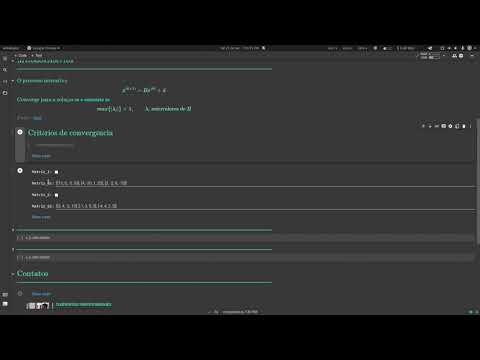

In [ ]:
#@markdown # $\color{turquoise}{\text{Vídeo de apresentação}}$
#@markdown > $\color{gray}{\text{Este vídeo apresenta a função e as suas funcionalidades}}$
from IPython.display import YouTubeVideo
YouTubeVideo('0X4c8f73pQQ', width=500, height=333)

#### $\color{Turquoise}{\text{O processo interativo}}$
#### $$\color{#7FFFD4}{x^{(k+1)}=Bx^{(k)}+d}$$
#### $\color{Turquoise}{\text{Converge para a solução }}$$\color{#00FFFF}{\text{se e somente se}}$
#### $$\color{#7FFFD4}{max\{|\lambda_i|\}<1,\qquad\lambda_i\:\text{autovalores de}\:B}$$

###### $\color{gray}{Fonte:}$ [Aqui](https://youtu.be/0KhoP01Ir9g)

In [ ]:
#@markdown # $\color{Turquoise}{\text{Critérios de convergência}}$
#@markdown > $\color{gray}{\text{convergencia(arr)}}$

def convergencia(arr):
    """
        Retorna uma str afirmando ou negando se a matriz converge
    """
    
    def interacao(arr):
        """
            Retorna uma matriz quadrada gerada pelo processo de interação 
        """
        arr = np.array(arr, dtype=np.float64, copy=True)

        if len(arr[0]) == len(arr)+1:
            arr = np.delete(arr, -1, 1)

        for j in range(len(arr)): # colunas
            for i in range(len(arr[0])): #linhas
                if j != i:
                    arr[j][i] = -1*arr[j][i]/arr.diagonal()[j]
            arr[j][j] = 0
        return arr

    # ---------------
    
    import numpy as np

    arr = np.array(arr, dtype=np.float64, copy=True)
    arr = interacao(arr)
    
    if len(arr[0]) == len(arr):
        auto_v = np.linalg.eigvals(arr)
        
        if np.max(abs(auto_v)) < 1:
            msg = '\033[32mA matriz converge\033[' # mensagem em verde
        else:
            msg = '\033[31mA matriz diverge\033[' # mensagem em vermelho
    else:
        msg = f'\033[31mErro! M[{len(arr[0])}][{len(arr)}]\033[' # mensagem de erro em vermelho

    return f'{msg}\n{abs(auto_v)}'

# convergencia([[15, 5, -5, 30], [4, -20, 1, 23], [2, -2, 8, -10]])
# convergencia([[3, 4, -2, 13], [-1, 3, 5, 0], [-4, 4, 2, 2]])

In [ ]:
Matriz_1 = True #@param {type:"boolean"}
if Matriz_1:
    Matriz_01 = [[15, 5, -5, 30], [4, -20, 1, 23], [2, -2, 8, -10]] #@param
    print(convergencia(Matriz_01))
Matriz_2 = False #@param {type:"boolean"}
if Matriz_2:
    Matriz_02 =  [[1, 0.9, 0.8, 0.4, 0.1, 0, 1], [0.9, 1, 0.8, 0.5, 0.2, 0.1, 0.9], [0.8, 0.8, 1, 0.7, 0.4, 0.2, 0.8], [0.4, 0.5, 0.7, 1, 0.6, 0.3, 0.7], [0.1, 0.2, 0.4, 0.6, 1, 0.5, 0.6], [0, 0.1, 0.2, 0.3, 0.5, 1, 0.5]]#@param
    print(convergencia(Matriz_02))

A matriz converge[
[0.39428305 0.39428305 0.13401165]


# <HR width=100% color="Turquoise	" align=left noshade>

In [ ]:
#@markdown # $\color{Turquoise}{\text{Método de Jacobi}}$
#@markdown > $\color{gray}{\text{m_jacobi(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True)}}$

def m_jacobi(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True):

    import numpy as np

    def trunc(arr1, arr2, tr=2):
        '''
            Retorna um booleano se arr1 == arr2, para o descimal definido
        '''

        def truncv(values, decs=0):
            values = np.array(values)
            return np.trunc(values*10**decs)/(10**decs)

        arr1, arr2 = truncv(arr1, decs=tr), truncv(arr2, decs=tr)

        comp = np.all([arr1==arr2, [True for _ in range(len(arr1))]]) 
        return comp

    def v(arr, cond, line=0):
        '''
            Retorna uma matriz solução
        '''
        
        def max_diagonal(arr):
                
            def permutation(arr, shift, end):
                arr = np.insert(arr, end, arr[shift], axis=0)
                finale = shift + 1 if shift > end else shift 
                arr = np.delete(arr, finale, axis=0)
                return arr 

            for i in range(len(arr)):
                arr = permutation(
                    arr,
                    np.where(arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                    i
                )
            return arr
        if permu:
            arr = max_diagonal(arr)

        n, rs = [arr[line][-1]], 0
        n.append(
            [x*i for x, i, c in zip(arr[line], cond, range(len(arr[0])))
            if c != line]
        )
        for k in n[1]:
            rs += k
        x = (n[0]-rs)/arr[line][line]

        return x

    
    ci = [ci]; arr = np.array(hea, dtype=np.float64, copy=True)

    for j in range(ni):
        ci.append([])
        for i in range(len(arr)):
            ci[j+1].append(v(arr, ci[j], line=i))
        
        if trc:
            if trunc(ci[j], ci[j+1], tr=tc):
                break
    
    return ci

In [ ]:
import numpy as np

matriz_m_jacobi = [[1, 0.9, 0.8, 0.4, 0.1, 0, 1], [0.9, 1, 0.8, 0.5, 0.2, 0.1, 0.9], [0.8, 0.8, 1, 0.7, 0.4, 0.2, 0.8], [0.4, 0.5, 0.7, 1, 0.6, 0.3, 0.7], [0.1, 0.2, 0.4, 0.6, 1, 0.5, 0.6], [0, 0.1, 0.2, 0.3, 0.5, 1, 0.5]]#@param
condicoes_iniciais =  [0, 0, 0, 0, 0, 0]#@param
loops = 150 #@param {type:"slider", min:0, max:150, step:1}
trun = True #@param {type:"boolean"}
permutacao = True #@param {type:"boolean"}
truncamento_decimal = 2 #@param {type:"slider", min:1, max:10, step:1}
#@markdown > $\color{gray}{\text{matriz_j = m_jacobi(matriz_m_jacobi, ci=condicoes_iniciais, ni=loops, tc = truncamento_decimal, trc=trun, permu=permutacao)}}$
matriz_j = np.array(m_jacobi(matriz_m_jacobi, ci=condicoes_iniciais, ni=loops, tc = truncamento_decimal, trc=trun, permu=permutacao), dtype=np.float64)
# print(f'\033[32m{matriz_j}'); print()
print(f'\033[32m{matriz_j}'); print()
testar_velocidade = True #@param {type:"boolean"}
if testar_velocidade:
    %timeit m_jacobi(matriz_m_jacobi, ci=condicoes_iniciais, ni=loops, tc = truncamento_decimal, trc=trun, permu=permutacao)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 1.00000000e+00  9.00000000e-01  8.00000000e-01  7.00000000e-01
   6.00000000e-01  5.00000000e-01]
 [-7.90000000e-01 -1.16000000e+00 -1.55000000e+00 -1.22000000e+00
  -6.70000000e-01 -2.60000000e-01]
 [ 3.83900000e+00  3.62100000e+00  3.53400000e+00  3.16100000e+00
   2.39300000e+00  1.62700000e+00]
 [-6.58980000e+00 -7.60410000e+00 -8.66330000e+00 -7.04380000e+00
  -4.63180000e+00 -2.71370000e+00]
 [ 1.80550300e+01  1.84810900e+01  1.94812400e+01  1.67954700e+01
   1.18282500e+01  7.42211000e+00]
 [-3.91189860e+01 -4.24401150e+01 -4.64014470e+01 -3.87230080e+01
  -2.64825540e+01 -1.61971230e+01]
 [ 9.44547197e+01  9.95059721e+01  1.06985833e+02  9.07973341e+01
   6.28928667e+01  3.88824803e+01]
 [-2.16752261e+02 -2.31563402e+02 -2.50860330e+02 -2.11125421e+02
  -1.45460640e+02 -8.95333973e+01]
 [ 5.09091558e+02  5.40273477e+02  5.83331261e+02  4.92921240e+02
   3.40373990e+02  2.0989

# <HR width=100% color="Turquoise	" align=left noshade>

In [ ]:
#@markdown # $\color{Turquoise}{\text{Método de Gauss Seidel}}$
#@markdown > $\color{gray}{\text{gauss_saidel(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True)}}$

def gauss_saidel(hea, ci=[0, 0, 0], ni=10, tc=2, trc=False, permu=True):

    import numpy as np

    def trunc(arr1, arr2, tr=2):
        '''
            Retorna um booleano se arr1 == arr2
        '''

        def truncv(values, decs=0):
            values = np.array(values)
            return np.trunc(values*10**decs)/(10**decs)

        arr1, arr2 = truncv(arr1, decs=tr), truncv(arr2, decs=tr)

        comp = np.all([arr1==arr2, [True for _ in range(len(arr1))]]) 
        return comp

    def v(arr, cond, line=0):
        '''
            Retorna uma matriz solução
        '''
        
        def max_diagonal(arr):
                
            def permutation(arr, shift, end):
                arr = np.insert(arr, end, arr[shift], axis=0)
                finale = shift + 1 if shift > end else shift 
                arr = np.delete(arr, finale, axis=0)
                return arr 

            for i in range(len(arr)):
                arr = permutation(
                    arr,
                    np.where(arr[i:, i] == max(arr[i:, i], key=abs))[0][0] + i,
                    i
                )
            return arr
        if permu:
            arr = max_diagonal(arr)

        n, rs = [arr[line][-1]], 0
        n.append(
            [x*i for x, i, c in zip(arr[line], cond, range(len(arr[0])))
            if c != line]
        )
        for k in n[1]:
            rs += k
        x = (n[0]-rs)/arr[line][line]

        return x

    
    arr = np.array(hea, dtype=np.float64, copy=True)
    hist = np.array([ci], dtype=np.float64, copy=True)

    for j in range(1, ni+1):
        for i in range(len(arr)):
            ci[i] = v(arr, ci, line=i)
        
        hist = np.append(hist, [ci], axis=0)

        if trc:
            if trunc(hist[j-1], hist[j], tr=tc):
                break
    return hist

In [ ]:
import numpy as np

matriz_g_saidel = [[1, 0.9, 0.8, 0.4, 0.1, 0, 1], [0.9, 1, 0.8, 0.5, 0.2, 0.1, 0.9], [0.8, 0.8, 1, 0.7, 0.4, 0.2, 0.8], [0.4, 0.5, 0.7, 1, 0.6, 0.3, 0.7], [0.1, 0.2, 0.4, 0.6, 1, 0.5, 0.6], [0, 0.1, 0.2, 0.3, 0.5, 1, 0.5]]#@param
condicoes_iniciais2 =  [0, 0, 0, 0, 0, 0]#@param
loops2 = 150 #@param {type:"slider", min:0, max:150, step:1}
trun2 = True #@param {type:"boolean"}
permutacao2 = True #@param {type: "boolean"}
truncamento_decimal2 = 3 #@param {type:"slider", min:1, max:10, step:1}
#@markdown > $\color{gray}{\text{matriz_j = gauss_saidel(matriz_g_saidel, ci=condicoes_iniciais2, ni=loops2, tc = truncamento_decimal2, trc=trun2, permu=permutacao2)}}$
matriz_j = np.array(gauss_saidel(matriz_g_saidel, ci=condicoes_iniciais2, ni=loops2, tc = truncamento_decimal2, trc=trun2, permu=permutacao2))
# print(f'\033[32m{matriz_j}'); print()
print(f'\033[32m{matriz_j}'); print()
testar_velocidade = True #@param {type:"boolean"}
if testar_velocidade:
    %timeit gauss_saidel(matriz_g_saidel, ci=condicoes_iniciais2, ni=loops2, tc = truncamento_decimal2, trc=trun2, permu=permutacao2)

[[ 0.          0.          0.          0.          0.          0.        ]
 [ 1.          0.          0.          0.3         0.32        0.25      ]
 [ 0.848      -0.1022     -0.18464     0.274148    0.3200072   0.3049    ]
 [ 1.09803208 -0.17208231 -0.32164629  0.28850641  0.32771793  0.3311266 ]
 [ 1.26401676 -0.2232075  -0.43191439  0.31236838  0.33802125  0.34598249]
 [ 1.38766878 -0.26175708 -0.52379222  0.33585809  0.34859533  0.35587906]
 [ 1.48541238 -0.29107338 -0.60118581  0.35628089  0.3584397   0.36324038]
 [ 1.56455837 -0.31330631 -0.66642222  0.37328943  0.36718046  0.36903801]
 [ 1.62907964 -0.3300185  -0.7212313   0.38721962  0.37473748  0.37371349]
 [ 1.68164009 -0.3424197  -0.76706774  0.3985447   0.38116346  0.37751038]
 [ 1.72429769 -0.35146982 -0.80521105  0.40771238  0.386566    0.38059248]
 [ 1.75875013 -0.35793491 -0.83679573  0.41510707  0.39106978  0.38308563]
 [ 1.7864282  -0.36242484 -0.86282267  0.42104946  0.39479873  0.38509282]
 [ 1.80854084 -0.36542238

# $\color{Turquoise}{\text{Contatos}}$
<HR width=100% color="Turquoise	" align=left noshade>

In [ ]:
#@title

%%html

<table style="white-space: nowrap; width: 0px;" border="0" cellspacing="0">
  <tbody>
    <tr>
      <td style="vertical-align: 0px;">
        <img style="border-right: 3px solid #30D5C8; padding-right: 13px; height: 90px;" src="https://i.pinimg.com/280x280_RS/79/42/c4/7942c414d01e7c8f8c179f905a5a86eb.jpg"/></td>
        <td style="white-space: nowrap; font-family: Helvetica, Arial; padding-left: 11px; font-size: 12px; vertical-align: middle; width: 560px;">
        <h1 style="white-space: nowrap; font-size: 14px; color: #30D5C8; line-height: 1; margin: 0 0 8px 0;">
          <b>CLEBSON DOS SANTOS MARQUES</b>
        </h1>

        <span style="color: #808080; data-contrast: none;">
          Estudante do Curso de Licenciatura em F&iacute;sica pela Universidade Estadual Vale do Acara&uacute;<br />
        </span>
        <span style="white-space: nowrap; font-size: 12px; color: #30D5C8; line-height: 1px; margin: 0 0 8px 0;" data-contrast="none">
          <b>Tel.:</b>
        </span>
        <span style="color: #808080; data-contrast: none;">(88) 9 9412 2413
          <br /><a style="color: #808080; data-contrast: none; text-decoration: none;" href="mailto:klebersantosy@gmail.com">klebersantosy@gmail.com</a><br />
          <a style="color: #808080; data-contrast: none; text-decoration: none;" href="http://lattes.cnpq.br/9411163467458250">http://lattes.cnpq.br/9411163467458250</a>
        </span>

        <div style="white-space: nowrap; margin-top: 8px;">
          <a style="white-space: nowrap; display: inline-block;" href="https://api.whatsapp.com/send?phone=558894122413">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://icon-library.com/images/icon-whatsapp-png/icon-whatsapp-png-2.jpg" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://t.me/clebson_marques">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://www.freepnglogos.com/uploads/telegram-png/telegram-communications-icons-24.png" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://www.passeidireto.com/perfil/371127-klebson-marques/">
            <img style="white-space: nowrap; width: 20px; height: 20px;" src="https://img.utdstc.com/icon/f63/09d/f6309d71c42e9f12c4aaf4800260f4c2ae9637ab4b148c381e8378e80ccce0e6:200" />
          </a> <a style="white-space: nowrap; display: inline-block;" href="https://github.com/kleber293">
            <img style="white-space: nowrap; width: 26px; height: 20px; object-fit: cover;" src="http://pngimg.com/uploads/github/github_PNG69.png" /></a>
        </div>
      </td>
    </tr>
  </tbody>
</table>

,CLEBSON DOS SANTOS MARQUES Estudante do Curso de Licenciatura em Física pela Universidade Estadual Vale do Acaraú Tel.: (88) 9 9412 2413 klebersantosy@gmail.com http://lattes.cnpq.br/9411163467458250
